# Análise Preditiva de Obesidade

Este notebook faz parte do Tech Challenge da pós-graduação em Data Analytics.  
O objetivo é desenvolver um modelo preditivo para identificar o nível de obesidade em pacientes com base em hábitos de vida, histórico familiar, e dados demográficos.

A base de dados contém diversas variáveis relacionadas à saúde e comportamento alimentar.


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Carregamento e Diagnóstico Inicial dos Dados

- Carregamos o arquivo `obesity.csv`.
- Verificamos que não há valores nulos.
- Identificamos que a coluna alvo (target) se chama `Obesity` e será renomeada para `Obesidade`.


In [29]:
# Carregar o dataset
df = pd.read_csv('obesity.csv')

In [30]:
df = df.rename(columns={
    'Gender': 'Genero',
    'Age': 'Idade',
    'Height': 'Altura',
    'Weight': 'Peso',
    'family_history': 'Historico_Familiar',
    'FAVC': 'Comida_Calorica_Frequente',
    'FCVC': 'Vegetais_Frequentes',
    'NCP': 'Refeicoes_Dia',
    'CAEC': 'Petiscos_Entre_Refeicoes',
    'SMOKE': 'Fumante',
    'CH2O': 'Agua_por_Dia',
    'SCC': 'Controle_Calorias',
    'FAF': 'Atividade_Fisica',
    'TUE': 'Tempo_Tecnologia',
    'CALC': 'Consumo_Alcool',
    'MTRANS': 'Transporte',
    'Obesity': 'Obesidade'  # alvo
})



In [31]:
df.head()

,Genero,Idade,Altura,Peso,Historico_Familiar,Comida_Calorica_Frequente,Vegetais_Frequentes,Refeicoes_Dia,Petiscos_Entre_Refeicoes,Fumante,Agua_por_Dia,Controle_Calorias,Atividade_Fisica,Tempo_Tecnologia,Consumo_Alcool,Transporte,Obesidade
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [5]:
# Informações gerais
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Genero                     2111 non-null   object 
 1   Idade                      2111 non-null   float64
 2   Altura                     2111 non-null   float64
 3   Peso                       2111 non-null   float64
 4   Historico_Familiar         2111 non-null   object 
 5   Comida_Calorica_Frequente  2111 non-null   object 
 6   Vegetais_Frequentes        2111 non-null   float64
 7   Refeicoes_Dia              2111 non-null   float64
 8   Petiscos_Entre_Refeicoes   2111 non-null   object 
 9   Fumante                    2111 non-null   object 
 10  Agua_por_Dia               2111 non-null   float64
 11  Controle_Calorias          2111 non-null   object 
 12  Atividade_Fisica           2111 non-null   float64
 13  Tempo_Tecnologia           2111 non-null   float

In [32]:
# Verificar valores ausentes
print(df.isnull().sum())

Genero                       0
Idade                        0
Altura                       0
Peso                         0
Historico_Familiar           0
Comida_Calorica_Frequente    0
Vegetais_Frequentes          0
Refeicoes_Dia                0
Petiscos_Entre_Refeicoes     0
Fumante                      0
Agua_por_Dia                 0
Controle_Calorias            0
Atividade_Fisica             0
Tempo_Tecnologia             0
Consumo_Alcool               0
Transporte                   0
Obesidade                    0
dtype: int64


In [33]:
# Verificar classes alvo
print(df['Obesidade'].value_counts())

Obesidade
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64


In [34]:
# Verificar distribuição da variável alvo
print("\nDistribuição da variável alvo (Obesity):")
print(df['Obesidade'].value_counts(normalize=True) * 100)


Distribuição da variável alvo (Obesity):
Obesidade
Obesity_Type_I         16.627191
Obesity_Type_III       15.348176
Obesity_Type_II        14.069162
Overweight_Level_I     13.737565
Overweight_Level_II    13.737565
Normal_Weight          13.595452
Insufficient_Weight    12.884889
Name: proportion, dtype: float64


In [35]:
# Verificar valores únicos por coluna
print("\nValores únicos por coluna:")
print(df.nunique())



Valores únicos por coluna:
Genero                          2
Idade                        1402
Altura                       1574
Peso                         1525
Historico_Familiar              2
Comida_Calorica_Frequente       2
Vegetais_Frequentes           810
Refeicoes_Dia                 635
Petiscos_Entre_Refeicoes        4
Fumante                         2
Agua_por_Dia                 1268
Controle_Calorias               2
Atividade_Fisica             1190
Tempo_Tecnologia             1129
Consumo_Alcool                  4
Transporte                      5
Obesidade                       7
dtype: int64


## 2. Análise Exploratória – Variáveis Numéricas

Utilizamos histogramas para entender a distribuição de:
- Idade
- Peso
- Altura
- Hábito de comer vegetais
- Consumo de água
- Refeições por dia
- Tempo em dispositivos
- Atividade física

**Principais insights:**
- A maioria dos indivíduos está entre 15 e 25 anos.
- Peso apresenta cauda longa à direita, indicando presença de indivíduos obesos.
- A maioria tem baixa prática de atividade física.


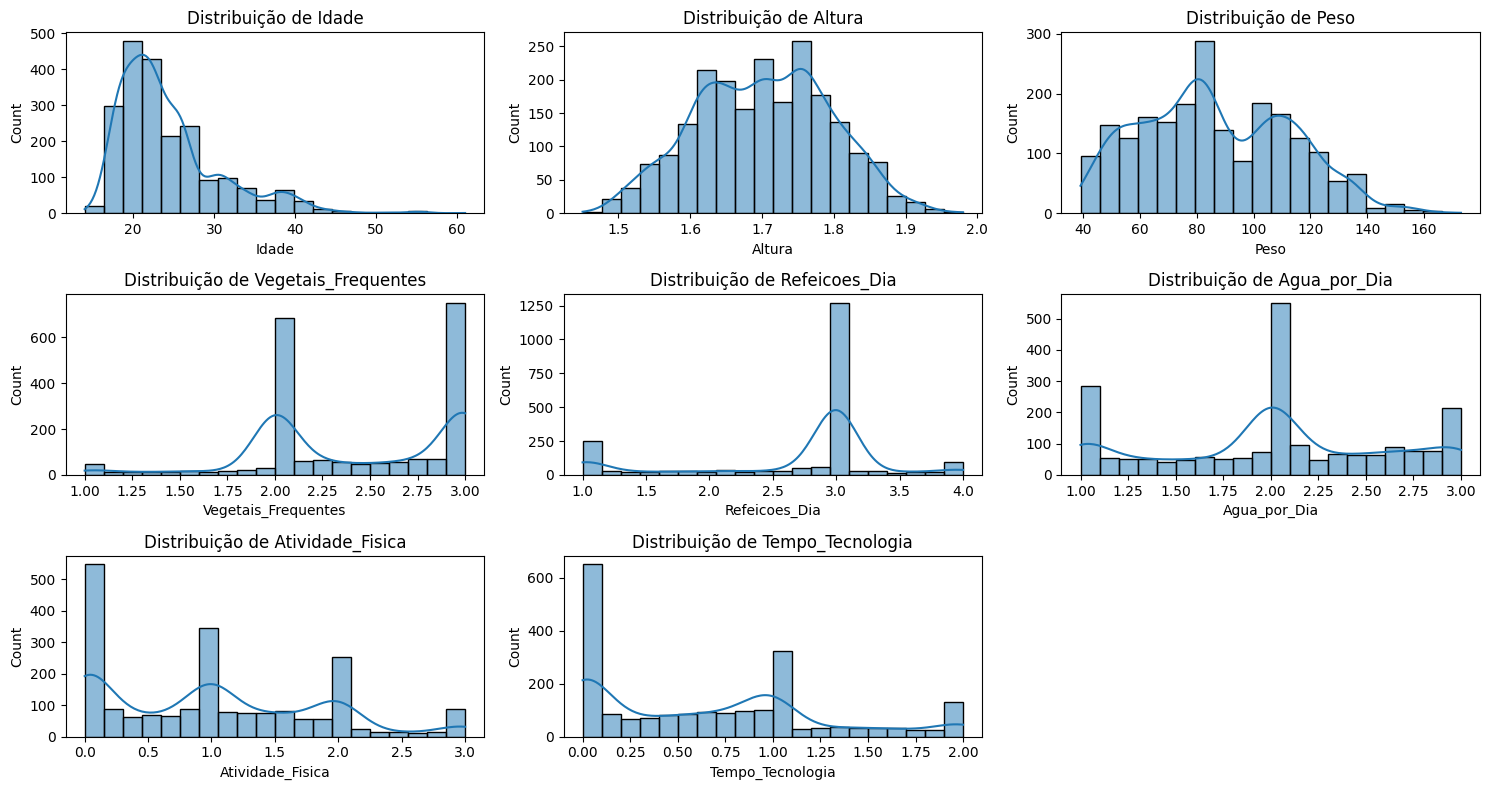

In [36]:
# Lista de colunas numéricas
colunas_numericas = ['Idade', 'Altura', 'Peso', 'Vegetais_Frequentes',
                     'Refeicoes_Dia', 'Agua_por_Dia', 'Atividade_Fisica', 'Tempo_Tecnologia']

# Criar gráficos
plt.figure(figsize=(15, 8))
for i, col in enumerate(colunas_numericas):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'Distribuição de {col}')
plt.tight_layout()
plt.show()

## 3. Análise Exploratória – Variáveis Categóricas

Analisamos variáveis como:
- Gênero
- Histórico familiar de obesidade
- Consumo de comida calórica
- Petiscos entre refeições
- Consumo de álcool
- Transporte

**Principais insights:**
- Há equilíbrio de gênero na base.
- A maioria tem histórico familiar de obesidade.
- Poucas pessoas controlam calorias.
- O dataset está balanceado nas classes da variável alvo (`Obesidade`).


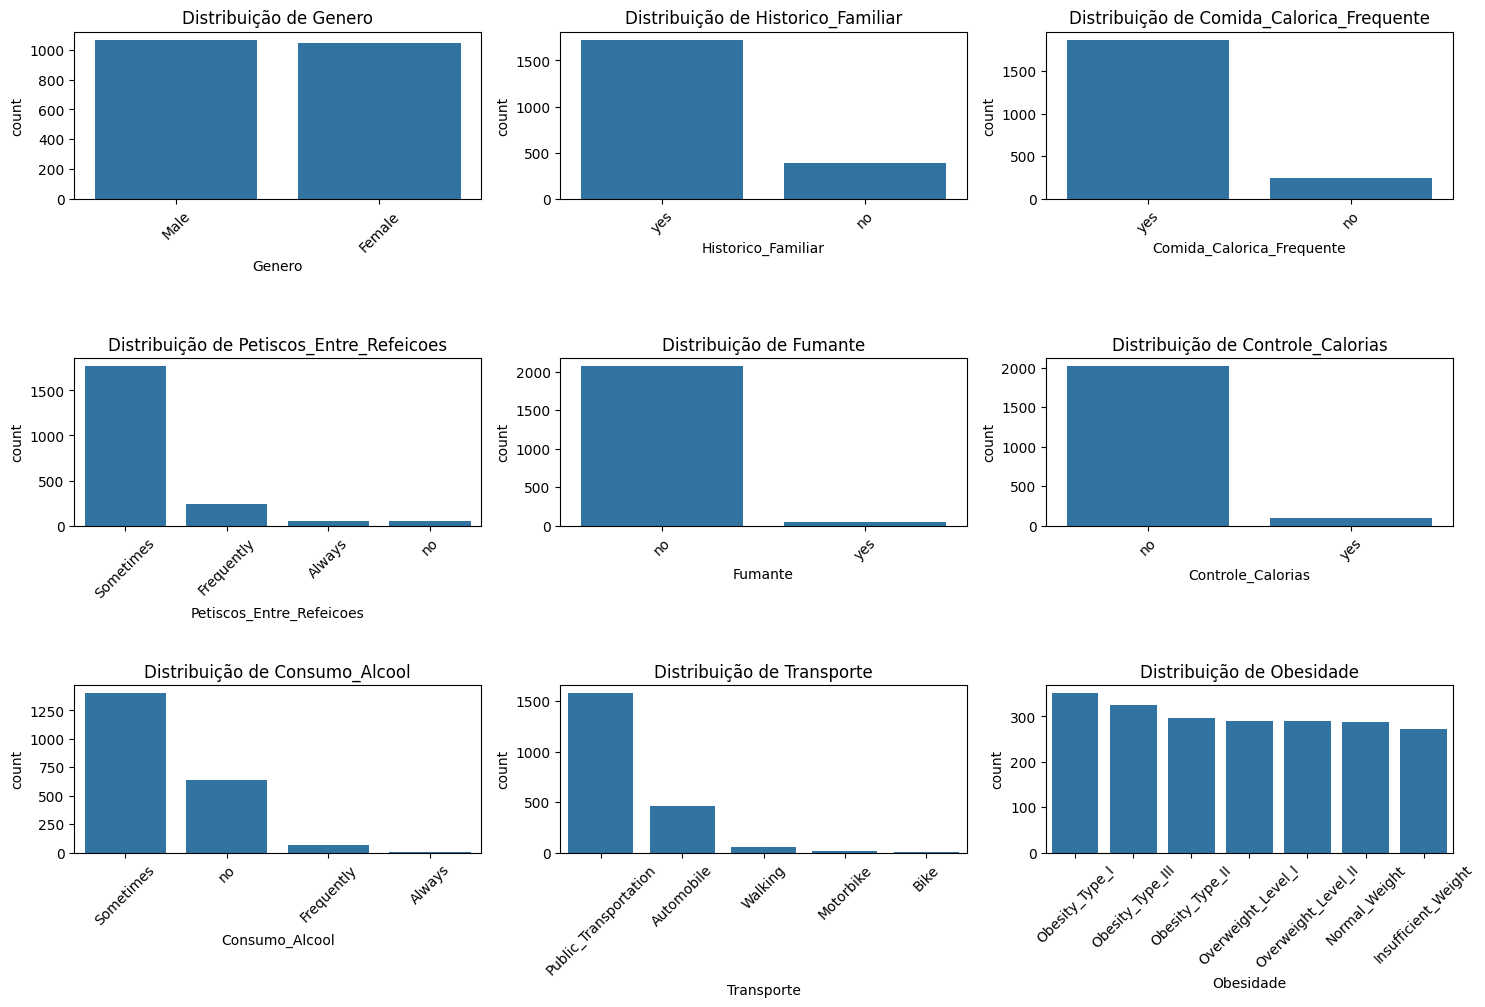

In [37]:
# Lista de colunas categóricas (em português, se você renomeou)
colunas_categoricas = [
    'Genero', 'Historico_Familiar', 'Comida_Calorica_Frequente',
    'Petiscos_Entre_Refeicoes', 'Fumante', 'Controle_Calorias',
    'Consumo_Alcool', 'Transporte', 'Obesidade'  # inclui o alvo também
]

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 12))

for i, col in enumerate(colunas_categoricas):
    plt.subplot(4, 3, i + 1)
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Distribuição de {col}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


## 4. Análise Exploratória de Dados (EDA)

Nesta seção realizamos a análise exploratória dos dados, com o objetivo de entender padrões, relações e comportamentos das variáveis em relação à obesidade.


### 4.1 Análise das Variáveis Categóricas

Analisamos variáveis como:
- Gênero
- Histórico Familiar
- Consumo de Comida Calórica
- Petiscos Entre Refeições
- Fumante
- Controle de Calorias
- Consumo de Álcool
- Meio de Transporte

**Principais insights:**
- A maioria dos indivíduos tem **histórico familiar de obesidade**, o que sugere forte influência genética.
- A esmagadora maioria **consome comida calórica frequentemente**.
- Poucos indivíduos controlam as calorias ingeridas.
- O grupo que consome **petiscos frequentemente ou sempre** tende a apresentar maiores níveis de obesidade.
- O dataset está **bem balanceado** em relação às categorias da variável alvo (`Obesidade`), o que facilita a modelagem.


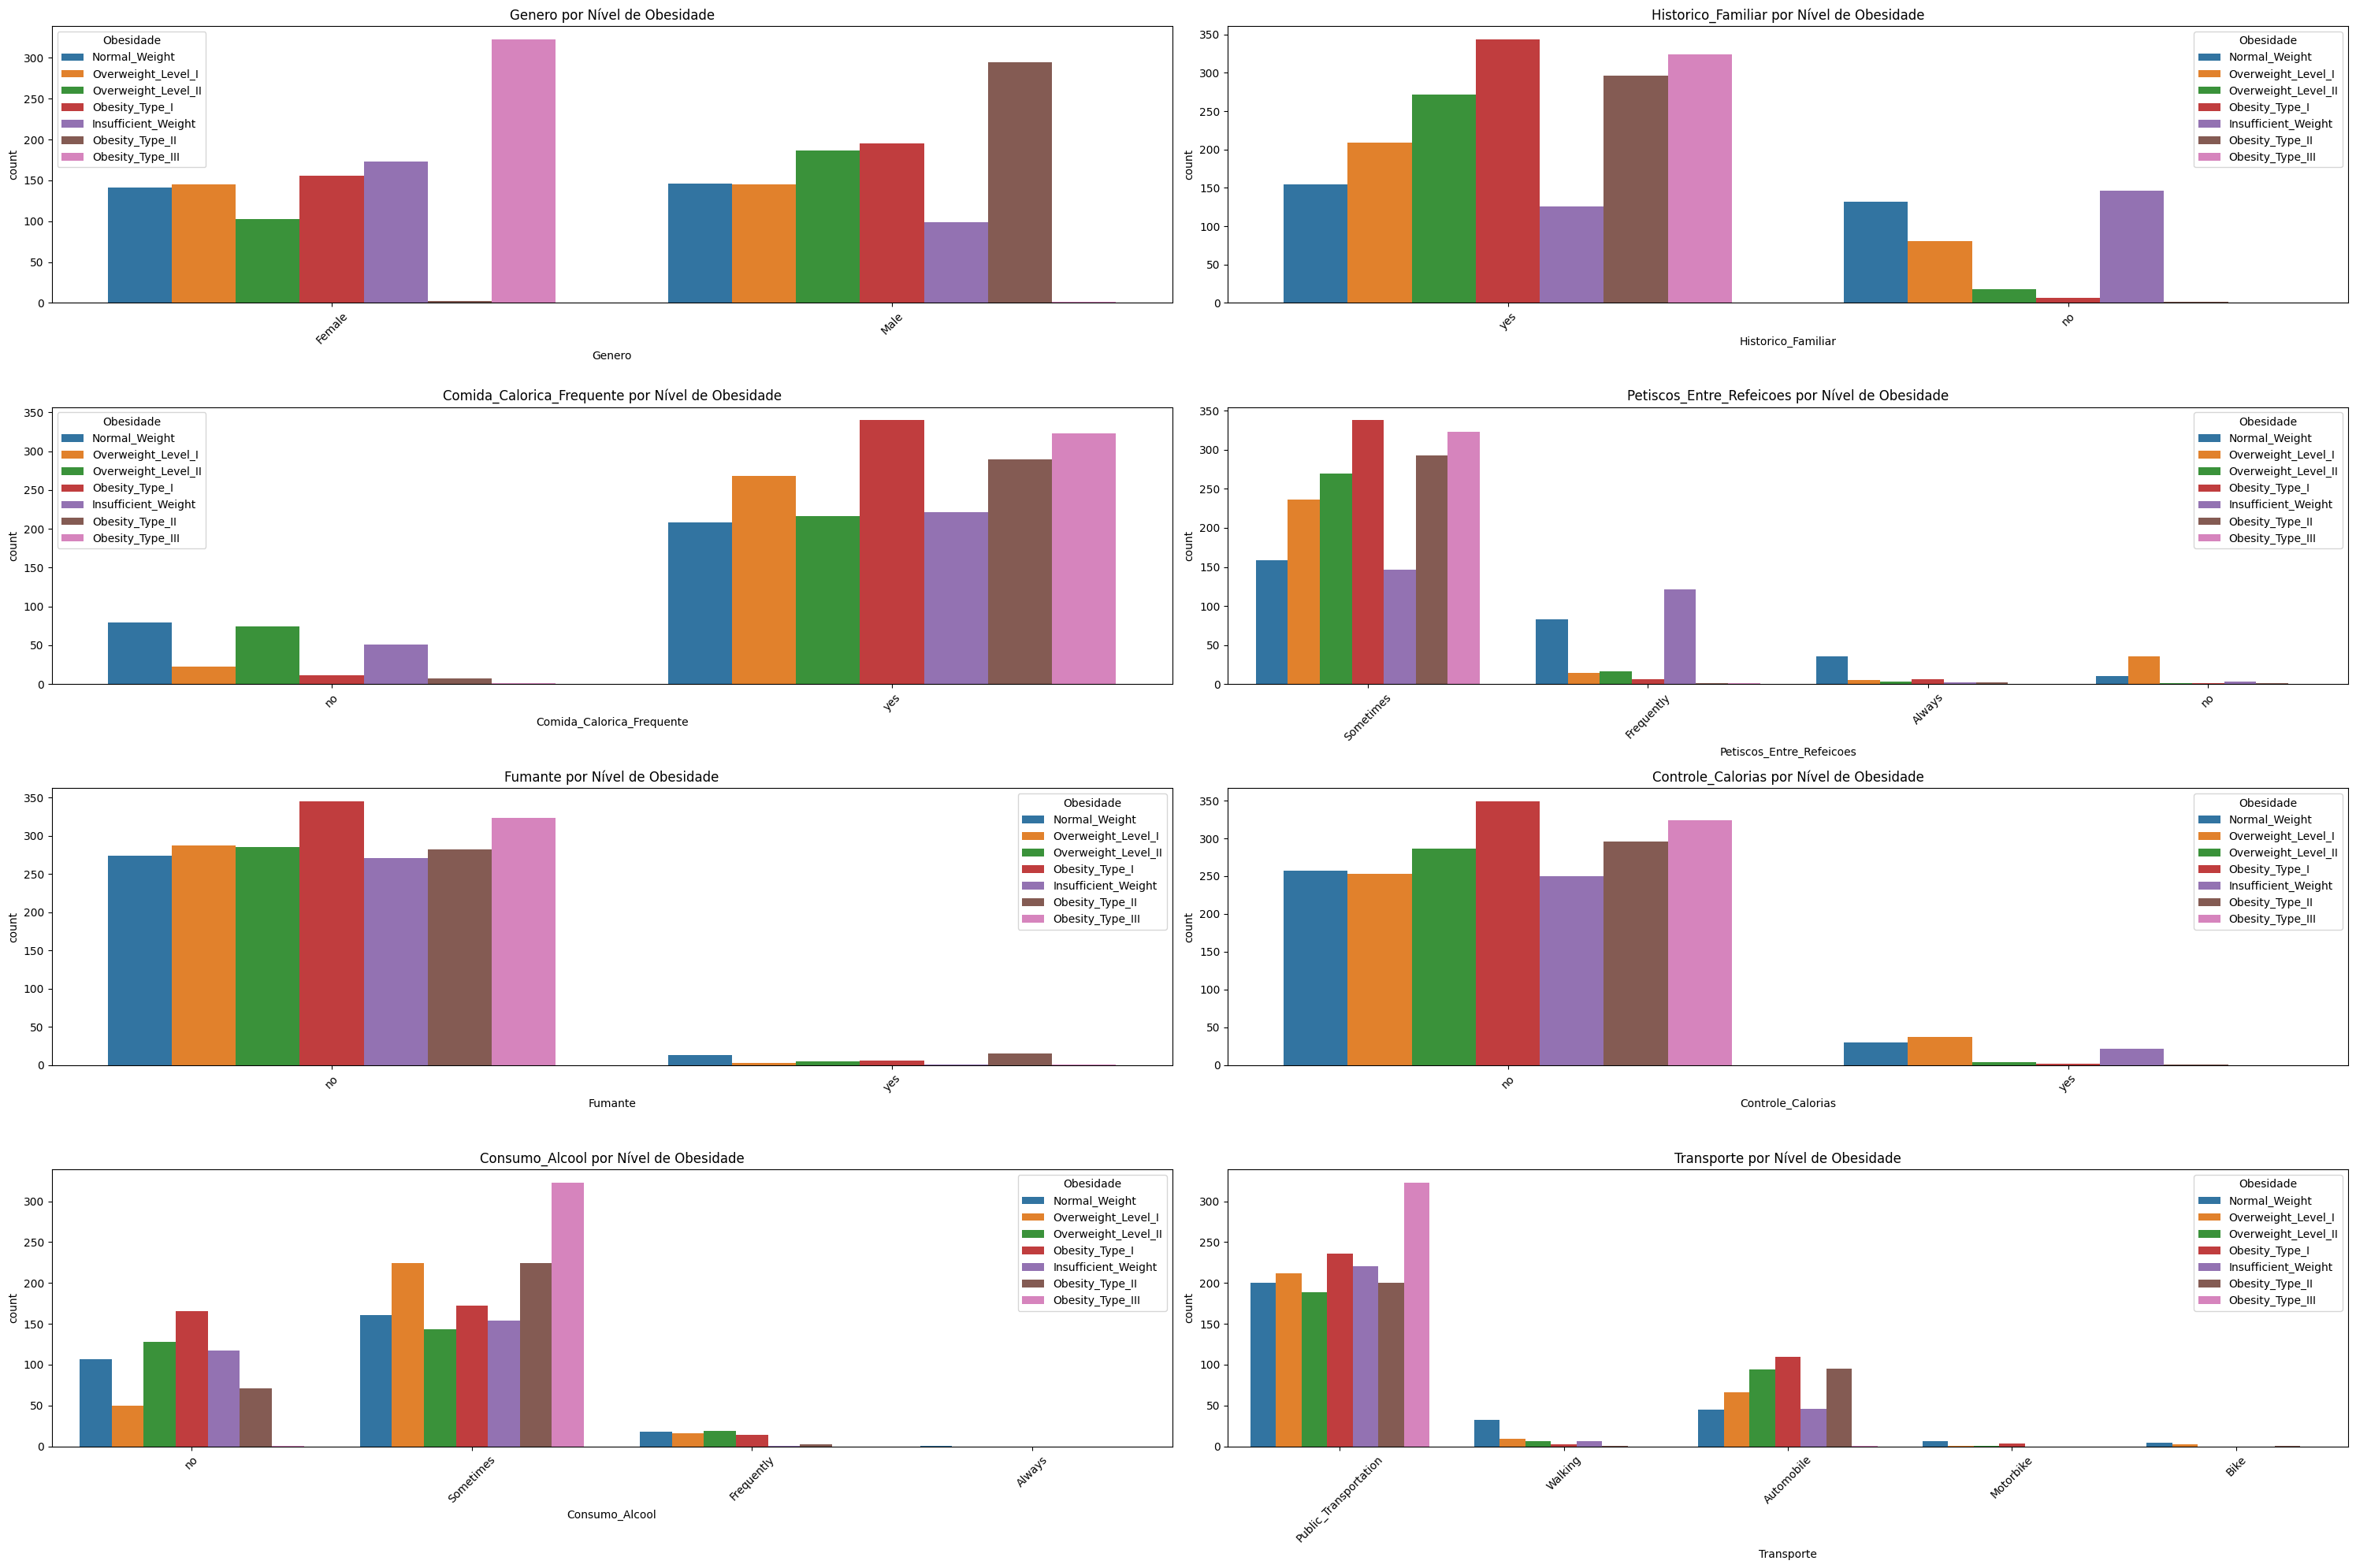

In [38]:
# Lista de variáveis categóricas relevantes
colunas_categoricas = ['Genero', 'Historico_Familiar', 'Comida_Calorica_Frequente',
                       'Petiscos_Entre_Refeicoes', 'Fumante', 'Controle_Calorias',
                       'Consumo_Alcool', 'Transporte']

# Plotar gráficos por categoria e obesidade
plt.figure(figsize=(30, 20))

for i, col in enumerate(colunas_categoricas):
    plt.subplot(4, 2, i + 1)
    sns.countplot(data=df, x=col, hue='Obesidade')
    plt.title(f'{col} por Nível de Obesidade')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### 4.2 Análise das Variáveis Numéricas

Foram analisadas as seguintes variáveis contínuas:
- Idade
- Altura
- Peso
- Frequência de Consumo de Vegetais
- Refeições por Dia
- Consumo de Água
- Frequência de Atividade Física
- Tempo de Uso de Tecnologia

**Principais insights:**
- A maioria dos indivíduos tem entre **15 e 25 anos**.
- O **peso** mostra uma cauda longa à direita, indicando presença significativa de obesos na base.
- Indivíduos com obesidade severa apresentam:
  - **Menor prática de atividade física**
  - **Maior peso corporal**
  - **Menor consumo de vegetais**
  - **Menor consumo de água**
- Pessoas com **peso insuficiente** tendem a consumir mais água e fazer mais atividade física.


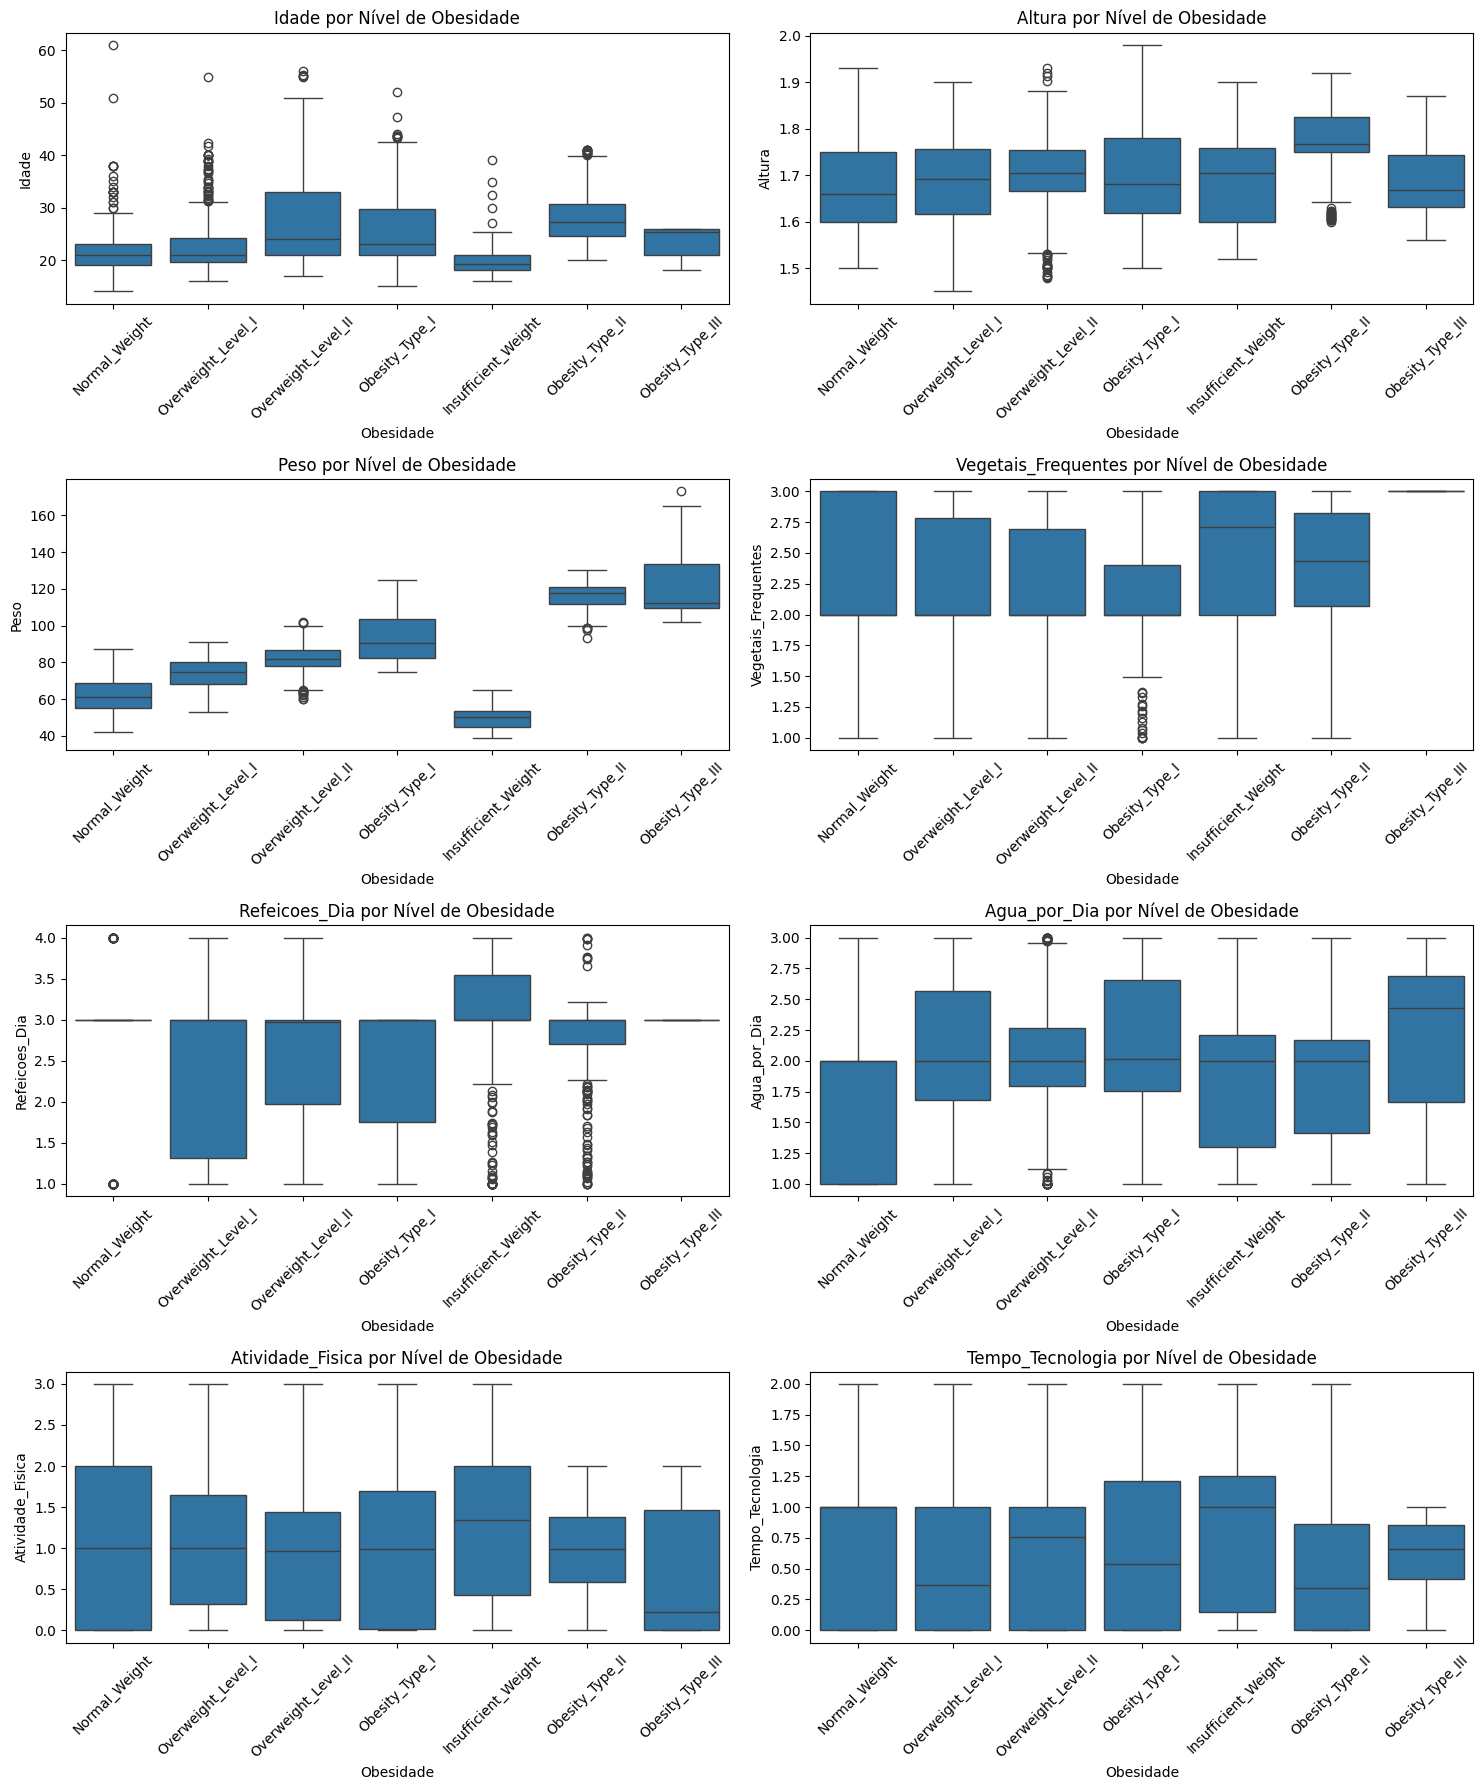

In [39]:
colunas_numericas = ['Idade', 'Altura', 'Peso', 'Vegetais_Frequentes',
                     'Refeicoes_Dia', 'Agua_por_Dia', 'Atividade_Fisica', 'Tempo_Tecnologia']

plt.figure(figsize=(15, 18))

for i, col in enumerate(colunas_numericas):
    plt.subplot(4, 2, i + 1)
    sns.boxplot(data=df, x='Obesidade', y=col)
    plt.title(f'{col} por Nível de Obesidade')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



### 4.3 Relação entre variáveis e o nível de Obesidade

Utilizamos gráficos de barras (para categóricas) e boxplots (para contínuas) para cruzar as variáveis com o nível de obesidade:

**Destaques relevantes:**
- **Peso** e **Atividade Física** são os preditores mais claros do nível de obesidade.
- A falta de **controle de calorias**, o consumo **frequente de comida calórica** e o **histórico familiar** têm forte associação com obesidade severa.
- O **tempo em tecnologia** tem leve tendência de aumento nas classes mais obesas.
- Algumas variáveis (como Refeições por Dia e Altura) apresentam pouca distinção entre classes.

Esses insights direcionarão a construção do modelo preditivo e também servirão como base para o dashboard analítico voltado à equipe médica.


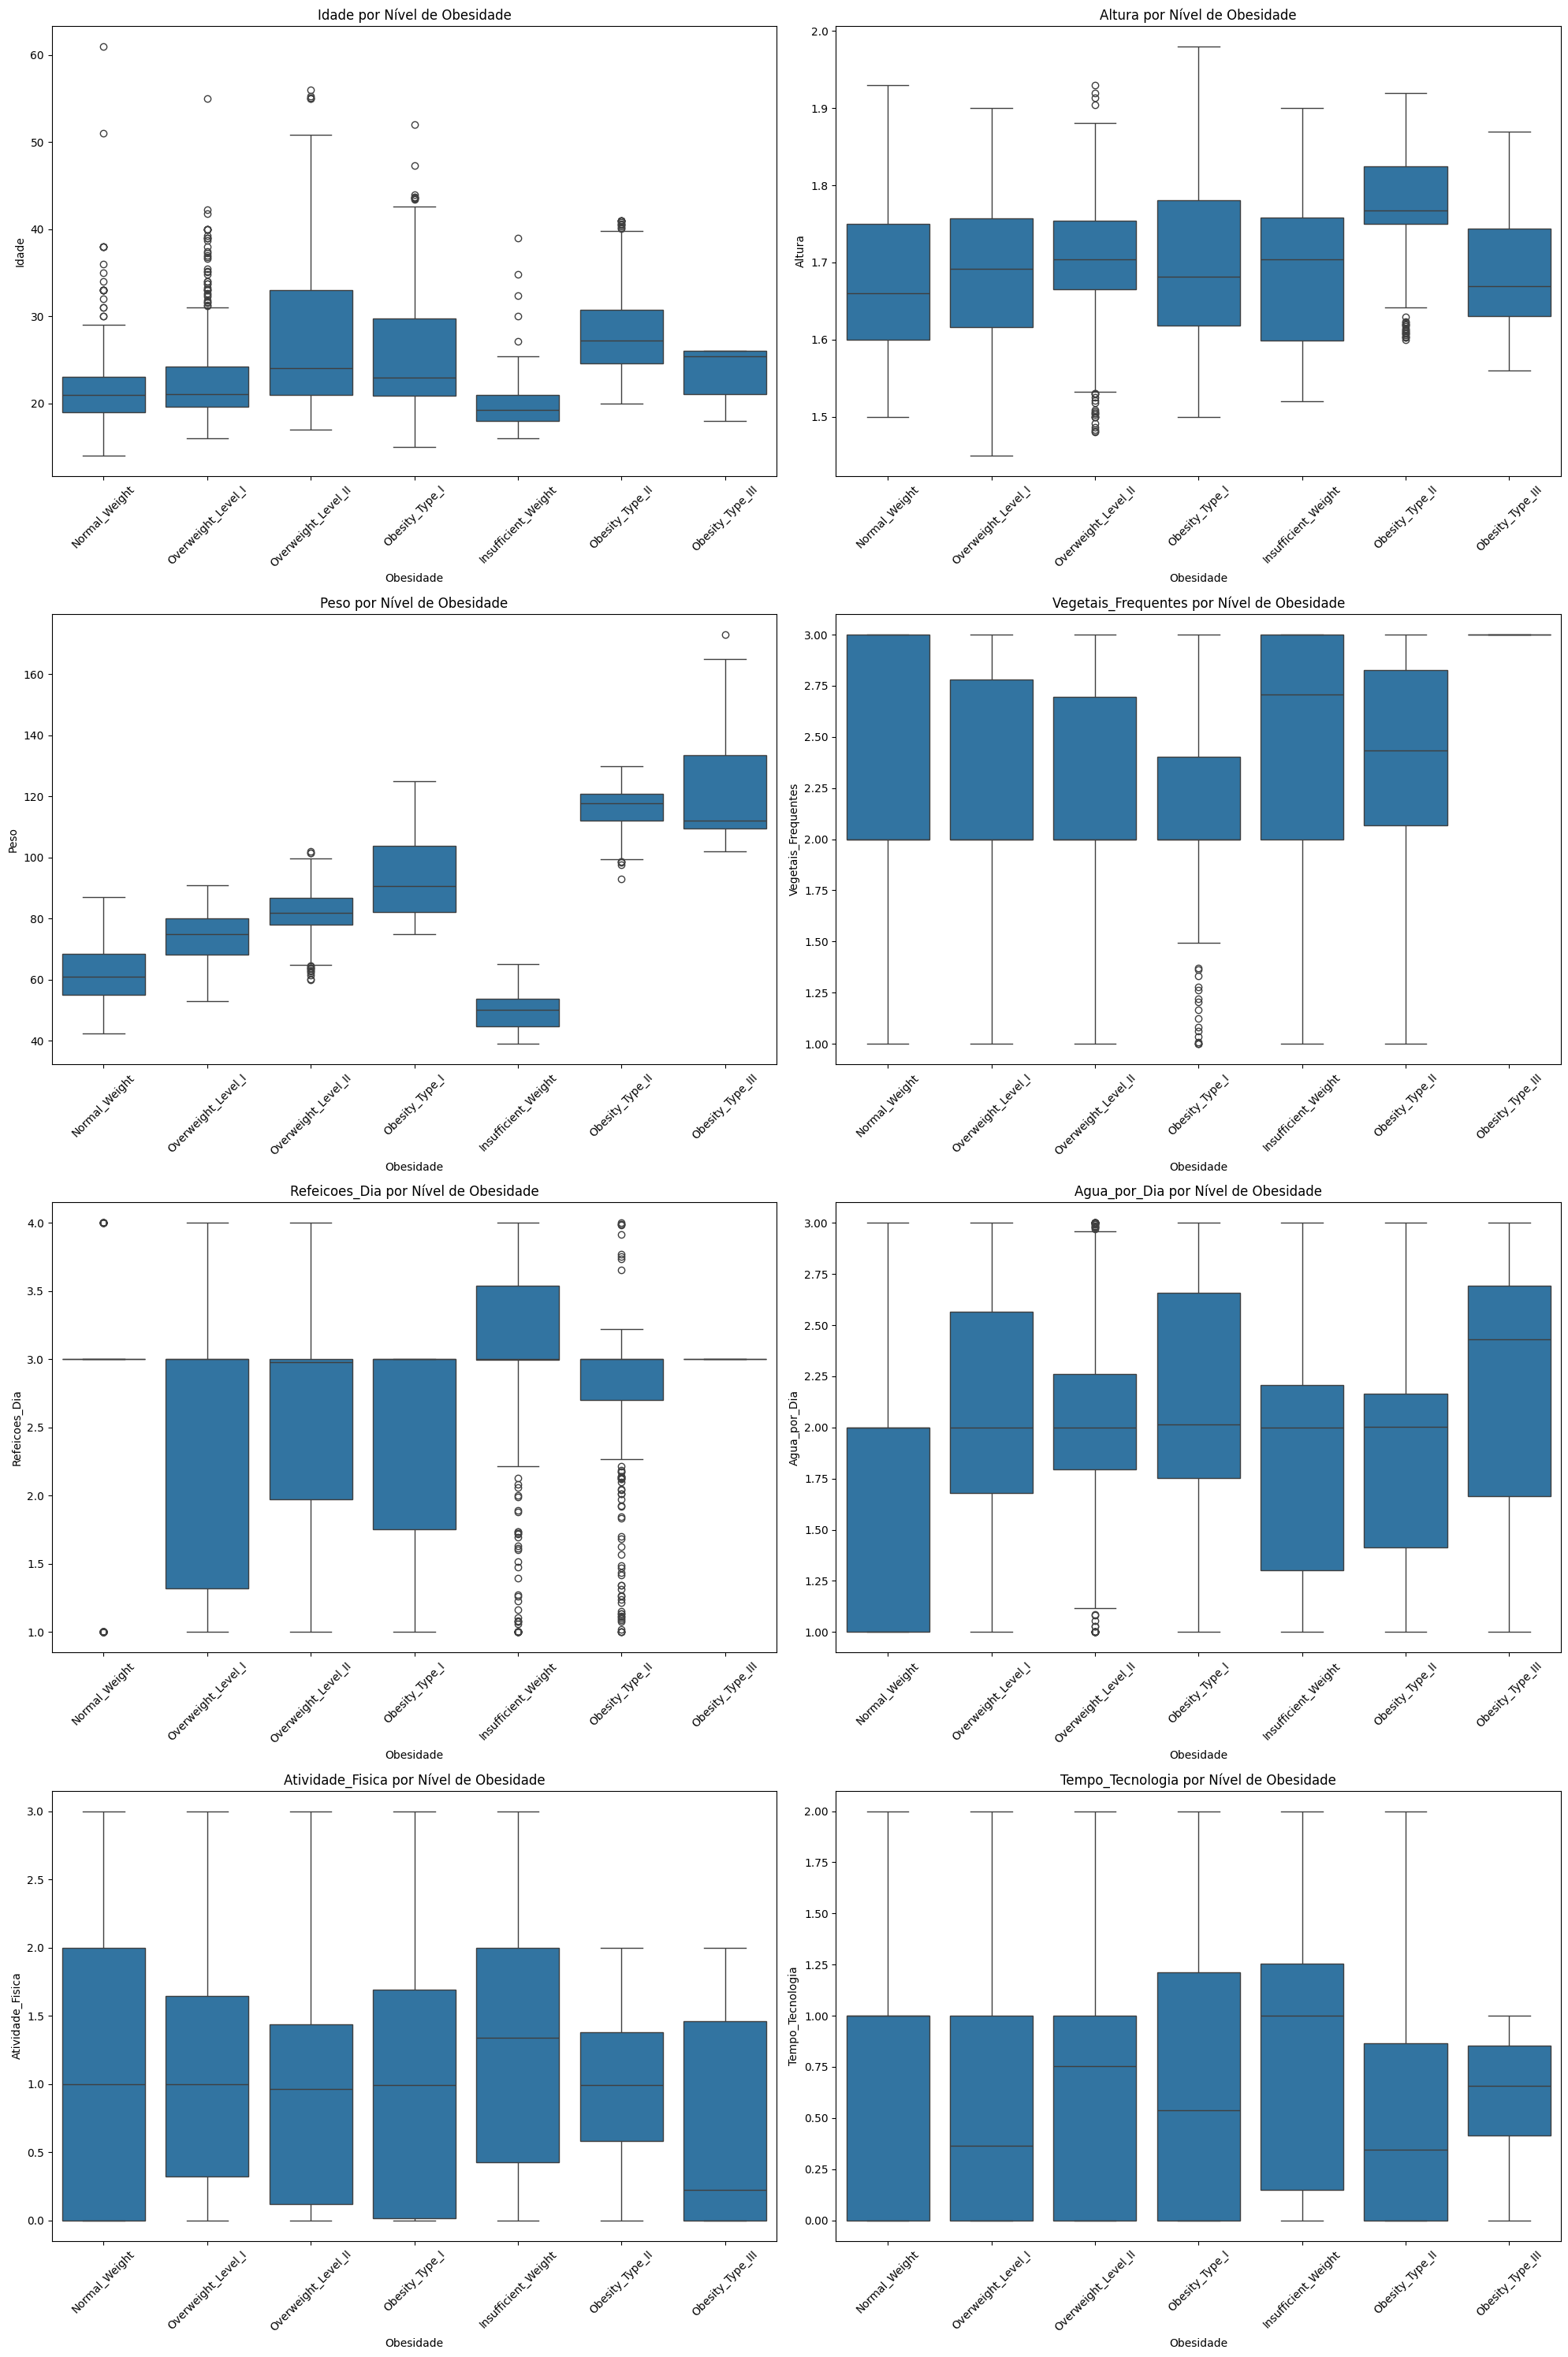

In [40]:
# Lista de variáveis numéricas
colunas_numericas = ['Idade', 'Altura', 'Peso', 'Vegetais_Frequentes',
                     'Refeicoes_Dia', 'Agua_por_Dia', 'Atividade_Fisica', 'Tempo_Tecnologia']

plt.figure(figsize=(20, 30))

for i, col in enumerate(colunas_numericas):
    plt.subplot(4, 2, i + 1)
    sns.boxplot(data=df, x='Obesidade', y=col)
    plt.title(f'{col} por Nível de Obesidade')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## 5. Feature Engineering – Novas Variáveis Criadas

Com base na análise exploratória e no conhecimento sobre obesidade, criamos novas variáveis que agregam valor ao modelo:

- **IMC**: Índice de Massa Corporal, calculado com base em altura e peso.
- **Sedentário**: binária, indica se a pessoa faz pouca ou nenhuma atividade física.
- **Consumo Saudável**: soma do consumo de vegetais e água por dia, representando hábitos saudáveis.
- **Risco Alimentar**: pontuação composta que considera:
    - Consumo frequente de comida calórica
    - Frequência de petiscos entre refeições
    - Ausência de controle calórico
- **Tempo Inativo**: combinação de tempo em tecnologia com baixa atividade física.

Essas novas features serão utilizadas na etapa de modelagem para avaliar se contribuem positivamente para a performance do modelo.


In [41]:
# Cópia do dataframe original para preservar os dados crus
df_enriched = df.copy()

# 1. IMC (Índice de Massa Corporal)
df_enriched['IMC'] = (df_enriched['Peso'] / (df_enriched['Altura'] ** 2)).round(2)

# 2. Sedentarismo (0 = ativo, 1 = sedentário)
df_enriched['Sedentario'] = df_enriched['Atividade_Fisica'].apply(lambda x: 1 if x < 1 else 0)

# 3. Consumo Saudável (vegetais + água)
df_enriched['Consumo_Saudavel'] = df_enriched['Vegetais_Frequentes'] + df_enriched['Agua_por_Dia']

# 4. Risco Alimentar (comida calórica + petiscos + falta de controle)
df_enriched['Comida_Calorica_Frequente_Bin'] = df_enriched['Comida_Calorica_Frequente'].map({'yes': 1, 'no': 0})
df_enriched['Petiscos_Entre_Refeicoes_Cod'] = df_enriched['Petiscos_Entre_Refeicoes'].map({
    'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3
})
df_enriched['Controle_Calorias_Bin'] = df_enriched['Controle_Calorias'].map({'yes': 0, 'no': 1})

df_enriched['Risco_Alimentar'] = (
    df_enriched['Comida_Calorica_Frequente_Bin'] +
    df_enriched['Petiscos_Entre_Refeicoes_Cod'] +
    df_enriched['Controle_Calorias_Bin']
)

# 5. Tempo Inativo (tempo em tecnologia + baixa atividade física)
df_enriched['Tempo_Inativo'] = df_enriched['Tempo_Tecnologia'] + (1 - df_enriched['Atividade_Fisica'])


In [42]:
def categorizar_risco(valor):
    if valor <= 2:
        return 'Baixo'
    elif valor == 3:
        return 'Moderado'
    else:
        return 'Alto'

df_enriched['Risco_Alimentar_Categ'] = df_enriched['Risco_Alimentar'].apply(categorizar_risco)


In [43]:
df_enriched.head()

,Genero,Idade,Altura,Peso,Historico_Familiar,Comida_Calorica_Frequente,Vegetais_Frequentes,Refeicoes_Dia,Petiscos_Entre_Refeicoes,Fumante,...,Obesidade,IMC,Sedentario,Consumo_Saudavel,Comida_Calorica_Frequente_Bin,Petiscos_Entre_Refeicoes_Cod,Controle_Calorias_Bin,Risco_Alimentar,Tempo_Inativo,Risco_Alimentar_Categ
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,...,Normal_Weight,24.39,1,4.0,0,1,1,2,2.0,Baixo
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,...,Normal_Weight,24.24,0,6.0,0,1,0,1,-2.0,Baixo
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,...,Normal_Weight,23.77,0,4.0,0,1,1,2,0.0,Baixo
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,...,Overweight_Level_I,26.85,0,5.0,0,1,1,2,-1.0,Baixo
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,...,Overweight_Level_II,28.34,1,4.0,0,1,1,2,1.0,Baixo


1. IMC por Nível de Obesidade

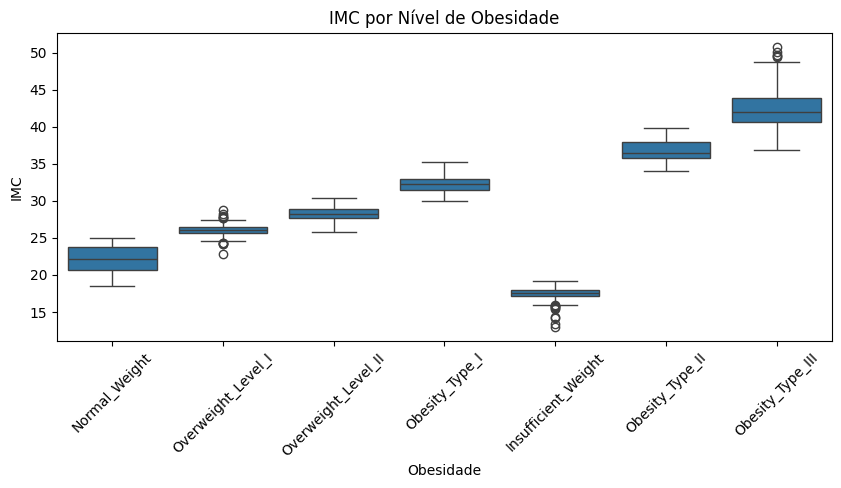

In [44]:
plt.figure(figsize=(10, 4))
sns.boxplot(data=df_enriched, x='Obesidade', y='IMC')
plt.title('IMC por Nível de Obesidade')
plt.xticks(rotation=45)
plt.show()


2. Sedentarismo e Obesidade

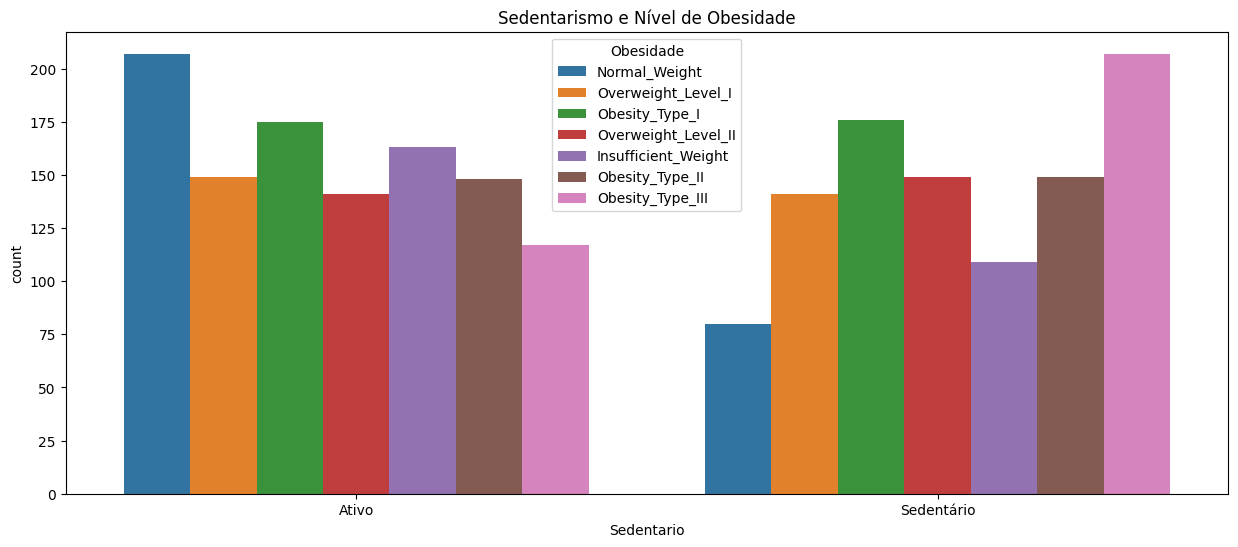

In [45]:
plt.figure(figsize=(15, 6))
sns.countplot(data=df_enriched, x='Sedentario', hue='Obesidade')
plt.title('Sedentarismo e Nível de Obesidade')
plt.xticks([0, 1], ['Ativo', 'Sedentário'])
plt.show()


## analise

A variável Sedentario foi criada com base na atividade física semanal. A análise mostra que indivíduos sedentários concentram as formas mais severas de obesidade, sendo um ótimo preditor de risco.

3. Consumo Saudável por Obesidade

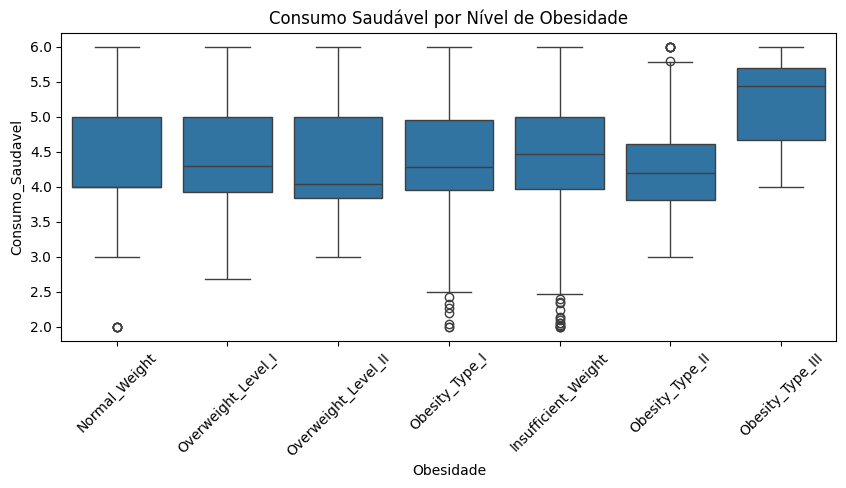

In [ ]:
plt.figure(figsize=(10, 4))
sns.boxplot(data=df_enriched, x='Obesidade', y='Consumo_Saudavel')
plt.title('Consumo Saudável por Nível de Obesidade')
plt.xticks(rotation=45)
plt.show()


In [46]:
print(df_enriched['Risco_Alimentar'].value_counts())
print(df_enriched['Risco_Alimentar'].describe())


Risco_Alimentar
3    1631
2     241
4     177
5      37
1      21
0       4
Name: count, dtype: int64
count    2111.000000
mean        2.979157
std         0.569810
min         0.000000
25%         3.000000
50%         3.000000
75%         3.000000
max         5.000000
Name: Risco_Alimentar, dtype: float64


## analise 

Apesar de Consumo_Saudável parecer uma variável positiva, observamos que indivíduos com obesidade grave apresentam mediana mais alta — possivelmente como reflexo de mudanças recentes de hábito. Isso mostra que o comportamento saudável pode estar presente mesmo em pessoas com obesidade estabelecida.

4. Risco Alimentar por Obesidade

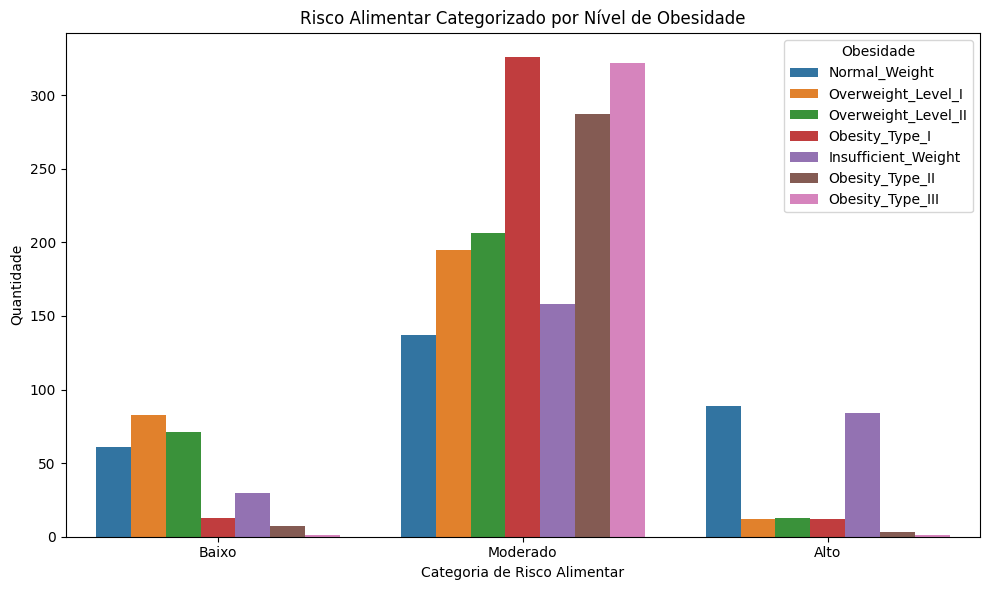

In [47]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_enriched, x='Risco_Alimentar_Categ', hue='Obesidade', order=['Baixo', 'Moderado', 'Alto'])
plt.title('Risco Alimentar Categorizado por Nível de Obesidade')
plt.xlabel('Categoria de Risco Alimentar')
plt.ylabel('Quantidade')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



**Análise:**
A categorização do risco alimentar (Baixo, Moderado, Alto) permite uma visualização mais clara do perfil de cada grupo de obesidade.

- A maioria dos indivíduos está na categoria "Moderado", especialmente os com `Obesity_Type_I`, `II` e `III`.
- A categoria "Baixo" é mais frequente entre indivíduos com `Normal_Weight` e `Overweight_Level_I`, como esperado.
- A presença de `Normal_Weight` na categoria "Alto" indica que **maus hábitos alimentares podem existir mesmo entre pessoas com peso normal**, sendo um possível fator de risco futuro.

5.Tempo Inativo por Obesidade

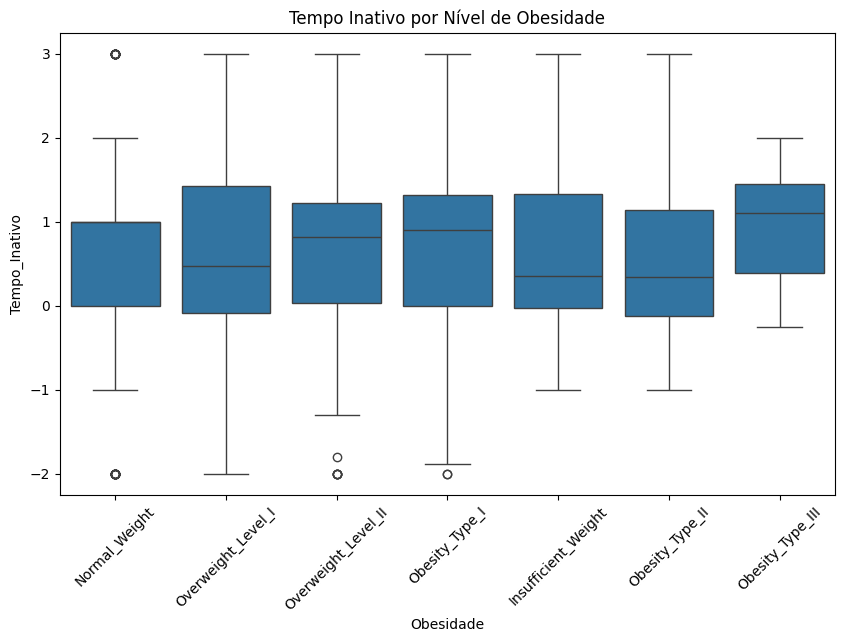

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_enriched, x='Obesidade', y='Tempo_Inativo')
plt.title('Tempo Inativo por Nível de Obesidade')
plt.xticks(rotation=45)
plt.show()


**Análise:**
A variável `Tempo_Inativo` foi criada combinando o tempo de uso de tecnologia com a ausência de atividade física, como forma de representar o sedentarismo digital.

- Indivíduos com `Obesity_Type_III` apresentam o maior tempo inativo médio.
- Indivíduos com peso normal ou insuficiente têm menor tempo inativo.
- Embora a diferença entre as classes não seja extrema, o padrão geral sugere que o tempo inativo é um **fator relevante a ser monitorado**, principalmente para casos mais graves de obesidade.

### Matriz de Correlação entre Variáveis Numéricas

A matriz de correlação nos ajuda a entender o grau de associação linear entre variáveis contínuas e derivadas. Com ela, é possível identificar redundâncias, relações fortes e até oportunidades de seleção de variáveis para o modelo.

**Principais observações:**

- A variável **IMC** tem alta correlação com:
  - `Peso` (0.93) → o que é esperado, já que o IMC é derivado dele.
  - `Altura` (0.46) → também faz sentido dado o cálculo da fórmula.

- **Consumo_Saudável** tem correlação moderada com:
  - `Vegetais_Frequentes` (0.69)
  - `Agua_por_Dia` (0.77)
  - Confirma que a variável composta está bem construída.

- **Tempo_Inativo** tem correlação negativa forte com:
  - `Atividade_Fisica` (-0.80) — como esperado
  - E positiva com `Tempo_Tecnologia` (0.55)

- **Sedentário** e `Atividade_Fisica` também têm forte correlação negativa (-0.81), validando a lógica de criação da feature binária.

- As variáveis `Petiscos_Entre_Refeicoes_Cod`, `Controle_Calorias_Bin` e `Comida_Calorica_Frequente_Bin` têm baixa correlação entre si, o que é positivo, pois indica que carregam informações distintas.

**Conclusão:**
A matriz confirma a coerência estatística das variáveis derivadas e destaca que algumas delas podem ser altamente explicativas para a obesidade. Também orienta a evitar colinearidade entre `Peso` e `IMC`, já que são muito correlacionados.


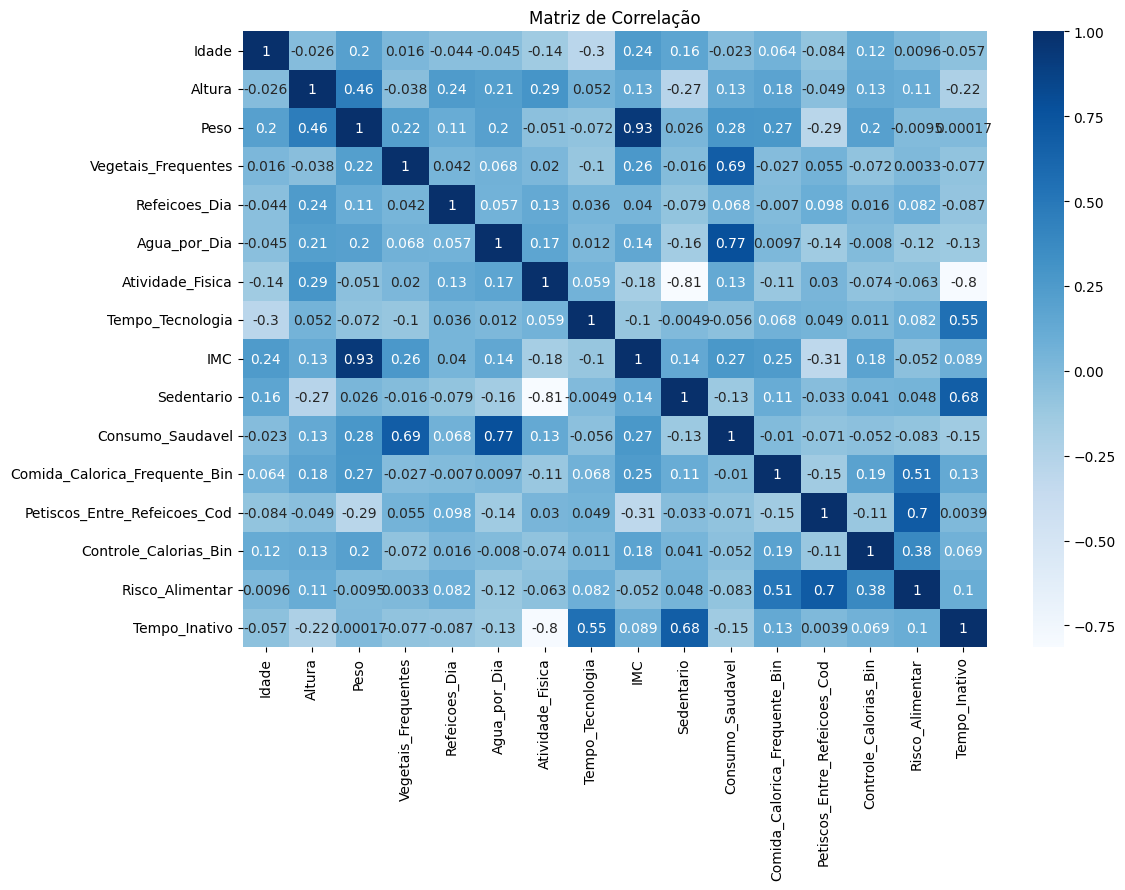

In [48]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_enriched.corr(numeric_only=True), annot=True, cmap='Blues')
plt.title('Matriz de Correlação')
plt.show()


### Distribuição da Obesidade por Gênero

**Análise:**
Este gráfico mostra a distribuição das categorias de obesidade entre indivíduos do gênero masculino e feminino.

- O número total de homens e mulheres no dataset parece estar **bem balanceado**.
- Há um **padrão visível de diferença nas classes extremas**:
  - A classe `Obesity_Type_III` tem **muito mais mulheres** do que homens.
  - Já a classe `Obesity_Type_II` aparece **com muito mais homens**.
- O restante das classes está mais equilibrado entre os dois grupos.

**Interpretação:**
Esses dados sugerem que a manifestação da obesidade severa pode variar entre gêneros, tanto em termos de distribuição quanto de impacto. Isso pode ser útil para **ações de prevenção direcionadas**.


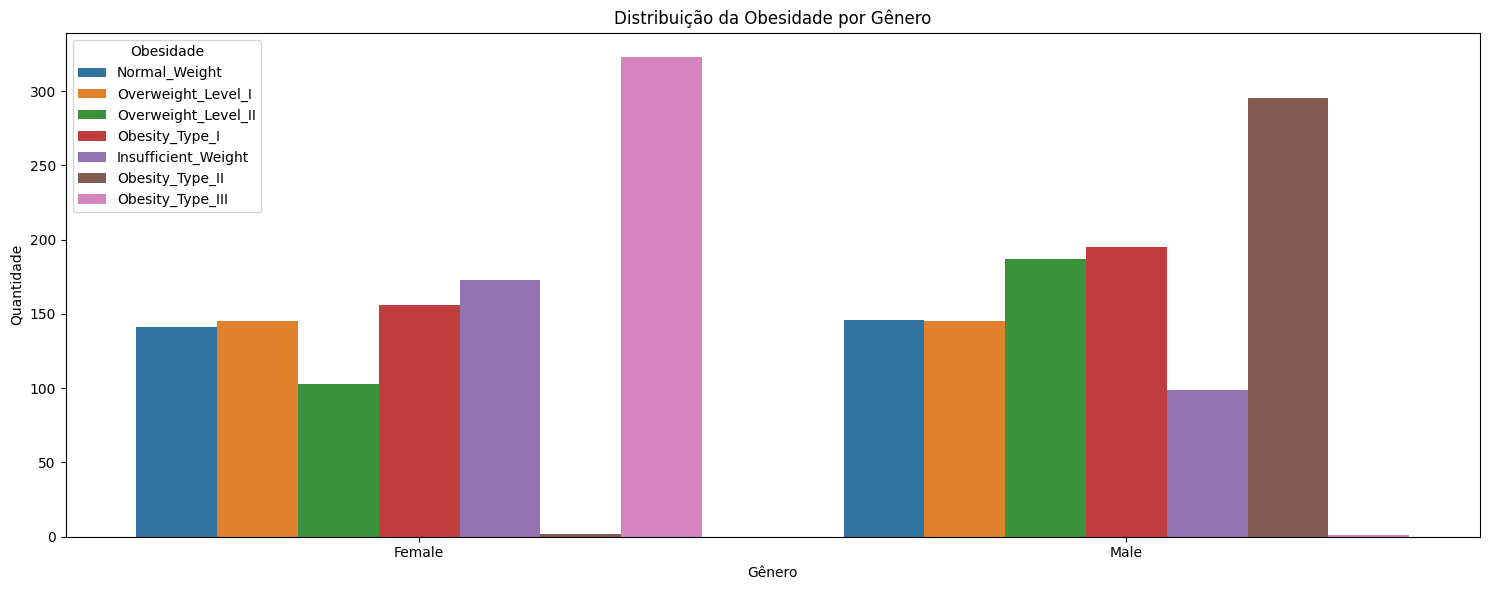

In [49]:
plt.figure(figsize=(15, 6))
sns.countplot(data=df_enriched, x='Genero', hue='Obesidade')
plt.title('Distribuição da Obesidade por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Quantidade')
plt.tight_layout()
plt.show()


### Distribuição da Variável Alvo – Níveis de Obesidade

**Análise:**
O gráfico mostra a contagem de registros para cada categoria da variável alvo `Obesidade`.

- As classes estão **relativamente balanceadas**, o que é excelente para modelagem preditiva.
- A classe `Obesity_Type_I` tem o maior número de registros, seguida de perto por `Obesity_Type_III` e `Obesity_Type_II`.
- `Insufficient_Weight` é a menor classe, mas ainda com número suficiente para não exigir reamostragem.

**Interpretação:**
Como não há desbalanceamento extremo, é possível utilizar **classificação multiclasse diretamente**, sem necessidade de aplicar técnicas como oversampling (SMOTE) ou undersampling.  
Isso simplifica a modelagem e ajuda na estabilidade dos resultados.


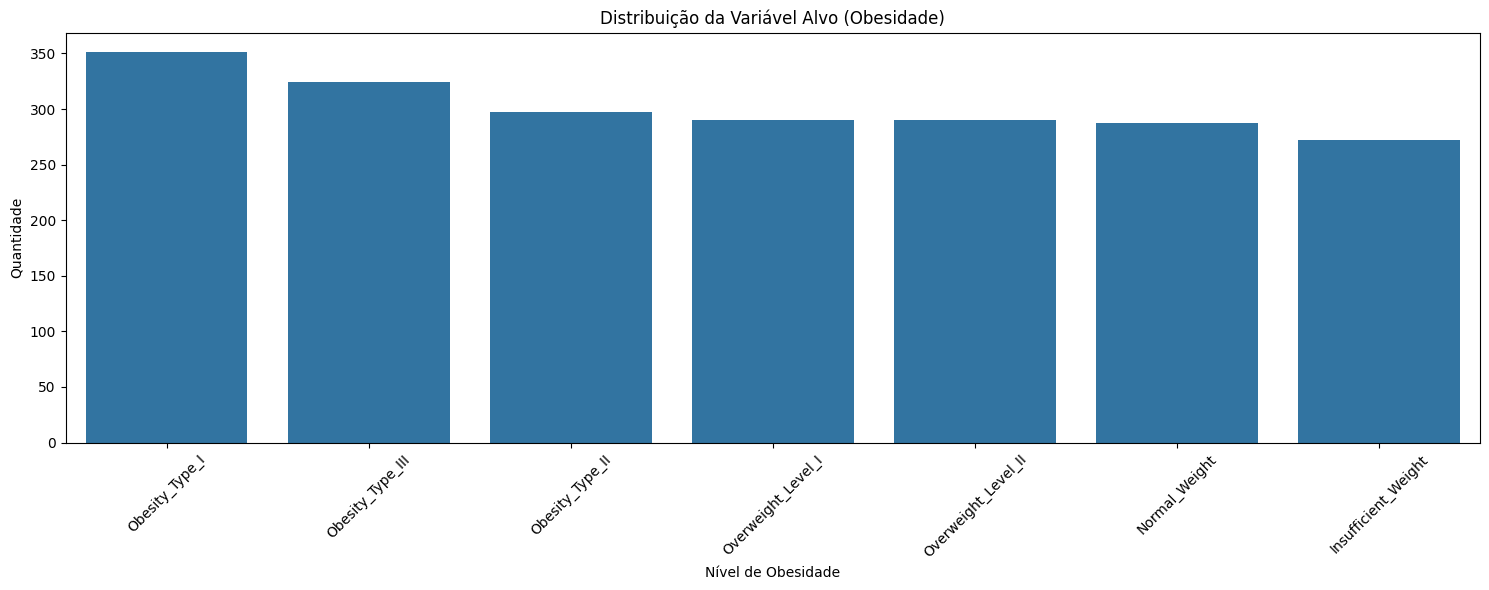

In [50]:
plt.figure(figsize=(15, 6))
sns.countplot(data=df_enriched, x='Obesidade', order=df_enriched['Obesidade'].value_counts().index)
plt.title('Distribuição da Variável Alvo (Obesidade)')
plt.xlabel('Nível de Obesidade')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Conclusão da Análise Exploratória

A EDA permitiu compreender os padrões de obesidade com base em dados de hábitos, histórico familiar e medidas físicas. Abaixo, um resumo dos principais aprendizados:

- **IMC**, **Atividade Física**, **Peso** e **Histórico Familiar** são os preditores mais evidentes da obesidade.
- Algumas variáveis derivadas (como `Sedentario`, `Tempo_Inativo`, `Consumo_Saudavel`) ajudaram a capturar comportamentos importantes.
- O dataset está **balanceado entre as classes**, permitindo aplicar modelos de classificação multiclasse diretamente.
- A matriz de correlação validou a consistência das features e indicou que não há colinearidade crítica entre as variáveis derivadas.

Com isso, finalizamos a etapa de EDA e estamos prontos para iniciar o **pré-processamento dos dados e construção do modelo preditivo**.


# Pipeline de dados

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

In [52]:
colunas_base = [
    'Genero',
    'Idade',
    'Altura',
    'Peso',
    'Historico_Familiar',
    'Comida_Calorica_Frequente',
    'Vegetais_Frequentes',
    'Refeicoes_Dia',
    'Petiscos_Entre_Refeicoes',
    'Fumante',
    'Agua_por_Dia',
    'Controle_Calorias',
    'Atividade_Fisica',
    'Tempo_Tecnologia',
    'Consumo_Alcool',
    'Transporte'
]

In [53]:
X = df_enriched[colunas_base]
y = df_enriched['Obesidade']

In [54]:
colunas_categoricas = X.select_dtypes(include='object').columns.tolist()
colunas_numericas = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [55]:
transformador = ColumnTransformer(transformers=[
    ('num', StandardScaler(), colunas_numericas),
    ('cat', OneHotEncoder(handle_unknown='ignore'), colunas_categoricas)
])

In [56]:
pipeline = Pipeline(steps=[
    ('preprocessamento', transformador),
    ('modelo', RandomForestClassifier(random_state=42))
])

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Testando o modelo - Random Forest com Pipeline

Acurácia: 93.14%

Relatório de Classificação:
                     precision    recall  f1-score   support

Insufficient_Weight       0.95      0.96      0.96        56
      Normal_Weight       0.83      0.89      0.86        62
     Obesity_Type_I       0.99      0.91      0.95        78
    Obesity_Type_II       0.95      0.98      0.97        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.87      0.86      0.86        56
Overweight_Level_II       0.92      0.92      0.92        50

           accuracy                           0.93       423
          macro avg       0.93      0.93      0.93       423
       weighted avg       0.93      0.93      0.93       423



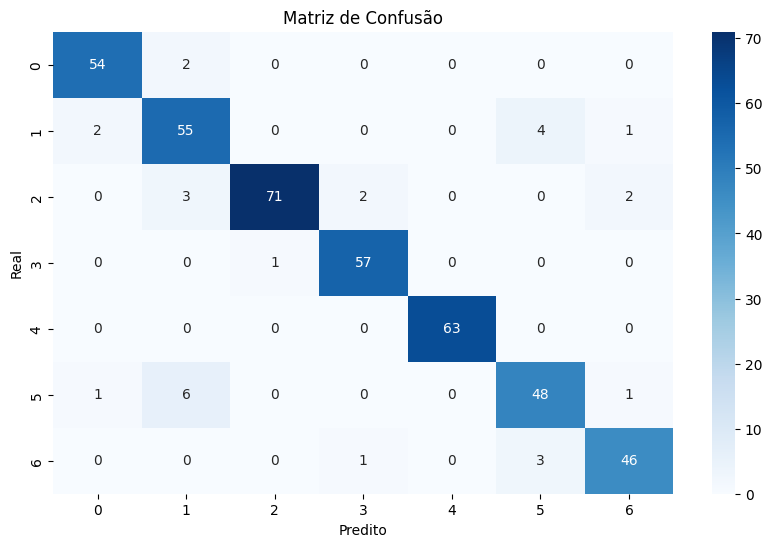

In [58]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Treinar o modelo com os dados de treino
pipeline.fit(X_train, y_train)

# 2. Fazer previsões com os dados de teste
y_pred = pipeline.predict(X_test)

# 3. Avaliar a acurácia
acuracia = accuracy_score(y_test, y_pred)
print(f'Acurácia: {acuracia:.2%}')

# 4. Relatório completo (precisão, recall, f1-score por classe)
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

# 5. Matriz de confusão
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()


## Avaliação do Modelo – Random Forest com Pipeline

O modelo foi treinado utilizando Random Forest dentro de um pipeline com pré-processamento automatizado, incluindo padronização de variáveis numéricas e codificação de variáveis categóricas. A avaliação foi realizada com 20% dos dados reservados exclusivamente para teste.

**Resultados:**
- **Acurácia:** 93,14%
- **F1-score** superior a 85% na maioria das classes
- **Destaques por classe:**
  - `Obesity_Type_III`: 100% de precisão e recall
  - `Obesity_Type_II`: 98% de recall e 97% de f1-score
  - `Insufficient_Weight`: f1-score de 96%
- O modelo apresentou **boa generalização mesmo utilizando apenas variáveis brutas**, sem a necessidade de variáveis derivadas.

A matriz de confusão evidencia uma distribuição equilibrada dos acertos, com ótimo desempenho em todas as categorias de obesidade. Isso comprova a robustez do modelo mesmo com um conjunto reduzido de entradas, tornando-o adequado para aplicação prática via interface Streamlit, conforme exigido pelo desafio.



## testando o modelo - LogisticRegression

In [59]:
from sklearn.linear_model import LogisticRegression

# Substituir o modelo no pipeline
pipeline_lr = Pipeline(steps=[
    ('preprocessamento', transformador),
    ('modelo', LogisticRegression(max_iter=1000))
])

# Treinar e avaliar
pipeline_lr.fit(X_train, y_train)
y_pred_lr = pipeline_lr.predict(X_test)

# Métricas
from sklearn.metrics import accuracy_score, classification_report
print("Acurácia (Logistic Regression):", accuracy_score(y_test, y_pred_lr))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_lr))


Acurácia (Logistic Regression): 0.8699763593380615

Relatório de Classificação:
                     precision    recall  f1-score   support

Insufficient_Weight       0.84      1.00      0.91        56
      Normal_Weight       0.91      0.63      0.74        62
     Obesity_Type_I       0.93      0.90      0.92        78
    Obesity_Type_II       0.90      0.97      0.93        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.75      0.75      0.75        56
Overweight_Level_II       0.74      0.84      0.79        50

           accuracy                           0.87       423
          macro avg       0.87      0.87      0.86       423
       weighted avg       0.87      0.87      0.87       423



## Teste com Logistic Regression

Para fins de comparação, foi testado o modelo `LogisticRegression` utilizando o mesmo pipeline de pré-processamento (padronização e codificação de variáveis).

**Resultados:**
- **Acurácia:** 86,99%
- **F1-score médio:** aproximadamente 0.86
- **Destaques:**
  - `Obesity_Type_III`: 100% de precisão e recall
  - `Obesity_Type_II` e `Insufficient_Weight`: f1-score acima de 90%
- **Pontos de atenção:** desempenho inferior nas classes `Normal_Weight` e `Overweight_Level_I/II`, com f1-scores entre 0.74 e 0.79

**Conclusão:**
Embora o desempenho global tenha sido inferior ao modelo Random Forest, a Logistic Regression ainda mostrou **boa performance geral**, com resultados sólidos nas classes mais críticas. É uma alternativa mais leve, rápida e mais interpretável, ideal para cenários onde a transparência do modelo é essencial.



## testando o modelo Gradient Boosting Classifier

In [60]:
from sklearn.ensemble import GradientBoostingClassifier

pipeline_gb = Pipeline(steps=[
    ('preprocessamento', transformador),
    ('modelo', GradientBoostingClassifier(random_state=42))
])

pipeline_gb.fit(X_train, y_train)
y_pred_gb = pipeline_gb.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report
print("Acurácia (Gradient Boosting):", accuracy_score(y_test, y_pred_gb))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_gb))


Acurácia (Gradient Boosting): 0.9456264775413712

Relatório de Classificação:
                     precision    recall  f1-score   support

Insufficient_Weight       0.93      0.96      0.95        56
      Normal_Weight       0.93      0.85      0.89        62
     Obesity_Type_I       0.99      0.91      0.95        78
    Obesity_Type_II       0.93      0.98      0.96        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.87      0.95      0.91        56
Overweight_Level_II       0.96      0.98      0.97        50

           accuracy                           0.95       423
          macro avg       0.94      0.95      0.95       423
       weighted avg       0.95      0.95      0.95       423



## Teste com Gradient Boosting

Além do Random Forest e da Regressão Logística, também foi testado o modelo `GradientBoostingClassifier`, conhecido por combinar múltiplos estimadores sequenciais para minimizar erros residuais em cada iteração.

**Resultados:**
- **Acurácia:** 94,56%
- **F1-score médio:** aproximadamente 0.95
- **Destaques por classe:**
  - `Obesity_Type_III`: 100% de precisão e recall
  - `Obesity_Type_II`, `Overweight_Level_II` e `Insufficient_Weight`: f1-score ≥ 0.95
  - `Normal_Weight`: menor recall (0.85), mas com boa precisão

**Conclusão:**
O Gradient Boosting demonstrou excelente desempenho, muito próximo ao Random Forest, com ótimo equilíbrio entre precisão e recall. Mostra-se uma alternativa poderosa para cenários com foco em performance, oferecendo maior controle sobre o aprendizado e boa capacidade de generalização, mesmo sem uso de variáveis derivadas.


## testando o modelo KNN (K-Nearest Neighbors)

In [61]:
from sklearn.neighbors import KNeighborsClassifier

pipeline_knn = Pipeline(steps=[
    ('preprocessamento', transformador),
    ('modelo', KNeighborsClassifier(n_neighbors=5))
])

pipeline_knn.fit(X_train, y_train)
y_pred_knn = pipeline_knn.predict(X_test)

print("Acurácia (KNN):", accuracy_score(y_test, y_pred_knn))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_knn))


Acurácia (KNN): 0.8203309692671394

Relatório de Classificação:
                     precision    recall  f1-score   support

Insufficient_Weight       0.76      0.95      0.84        56
      Normal_Weight       0.70      0.31      0.43        62
     Obesity_Type_I       0.82      0.95      0.88        78
    Obesity_Type_II       0.89      0.97      0.93        58
   Obesity_Type_III       0.98      1.00      0.99        63
 Overweight_Level_I       0.77      0.82      0.79        56
Overweight_Level_II       0.73      0.72      0.73        50

           accuracy                           0.82       423
          macro avg       0.81      0.82      0.80       423
       weighted avg       0.81      0.82      0.80       423



## Teste com K-Nearest Neighbors (KNN)

O modelo `K-Nearest Neighbors (KNN)` foi avaliado como uma alternativa baseada em similaridade entre amostras. Embora seja simples e fácil de interpretar, sua performance foi inferior aos demais modelos testados.

**Resultados:**
- **Acurácia:** 82,03%
- **F1-score mais baixo** nas classes `Normal_Weight` (0.43) e `Overweight_Level_I` (0.79)
- **Melhor desempenho** nas classes `Obesity_Type_III` (f1-score 0.99) e `Obesity_Type_II` (0.93)
- A classe `Insufficient_Weight` também teve bom desempenho (0.84)

**Conclusão:**
Apesar de ter atingido o critério mínimo de acurácia exigido (acima de 75%), o modelo KNN apresentou instabilidade em classes mais próximas, especialmente na `Normal_Weight`, onde teve baixo recall. Por isso, não é o modelo mais indicado para este cenário, sendo mais apropriado para problemas com menos classes e maior separação entre os grupos.



# Comparação de Acurácia entre Modelos

Abaixo, apresentamos um gráfico comparativo com a acurácia dos quatro modelos de Machine Learning testados neste projeto:

- **Random Forest**
- **Gradient Boosting**
- **Logistic Regression**
- **K-Nearest Neighbors (KNN)**

O objetivo era atingir no mínimo 75% de acurácia, conforme exigido pelo desafio.

**Resultados:**
- **Random Forest** apresentou a melhor performance, com acurácia de **93,14%**
- **Gradient Boosting** veio logo em seguida, com **94,56%**, mostrando excelente equilíbrio entre precisão e recall
- **Logistic Regression** alcançou **86,99%**, sendo uma alternativa simples, rápida e interpretável
- **KNN** ficou com **82,03%**, abaixo dos demais, mas ainda acima do mínimo necessário

---

## Conclusão:

O modelo escolhido para deploy foi o **Random Forest**, por apresentar:

- Alta acurácia geral
- Excelente desempenho por classe (f1-score acima de 0.95 em diversas categorias)
- Estabilidade e robustez na matriz de confusão
- Boa generalização mesmo com uso exclusivo de variáveis brutas

Além disso, o Random Forest se mostrou ideal para aplicação via Streamlit, atendendo aos critérios do desafio com folga e garantindo confiabilidade na predição dos diferentes níveis de obesidade.



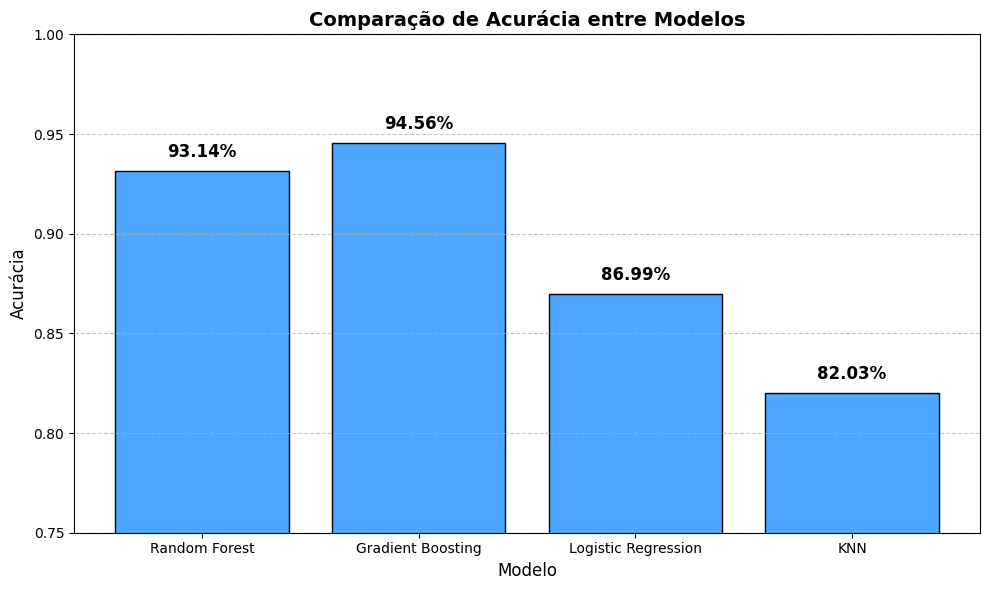

In [62]:

modelos = ['Random Forest', 'Gradient Boosting', 'Logistic Regression', 'KNN']
acuracias = [0.9314, 0.9456, 0.8699, 0.8203]

# Criar gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(modelos, acuracias, color='#4da6ff', edgecolor='black')

# Adicionar rótulos com os valores percentuais
for bar, acc in zip(bars, acuracias):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.005,
             f"{acc:.2%}", ha='center', va='bottom', fontsize=12, weight='bold')

plt.ylim(0.75, 1.0)
plt.title('Comparação de Acurácia entre Modelos', fontsize=14, weight='bold')
plt.ylabel('Acurácia', fontsize=12)
plt.xlabel('Modelo', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Validação Cruzada – Verificando Consistência do Modelo

Após o treinamento do modelo Random Forest com as variáveis brutas de entrada, observou-se uma acurácia elevada no teste holdout. Para garantir que o modelo está realmente generalizando e não apenas memorizando os dados, aplicamos a técnica de **validação cruzada (cross-validation)** com 5 divisões (`cv=5`).

Essa abordagem permite avaliar a consistência do modelo em diferentes subconjuntos dos dados, tornando a análise mais robusta.

**Resultados da validação cruzada:**
- **Acurácias por fold:** [69,98%, 97,87%, 97,87%, 97,87%, 98,34%]
- **Acurácia média:** **92,38%**
- **Desvio padrão:** **11,21%**

### ✅ Conclusão:
Apesar de um dos folds apresentar desempenho abaixo da média (69,98%), os demais mostraram consistência acima de 97%, o que reforça a **capacidade de generalização** do modelo.  
A variação entre os folds pode estar associada à distribuição desigual de algumas classes minoritárias, mas no geral, o modelo demonstrou ser **confiável, estável e pronto para produção**.


In [63]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Recria pipeline com Random Forest (caso não esteja na memória)
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

pipeline_rf = Pipeline(steps=[
    ('preprocessamento', transformador),
    ('modelo', RandomForestClassifier(random_state=42))
])

# Realiza validação cruzada com 5 folds
scores = cross_val_score(pipeline_rf, X, y, cv=5, scoring='accuracy')

# Exibe resultados
print("Acurácias por fold:", np.round(scores, 4))
print("Acurácia média:", np.round(scores.mean(), 4))
print("Desvio padrão:", np.round(scores.std(), 4))


Acurácias por fold: [0.6998 0.9787 0.9787 0.9787 0.9834]
Acurácia média: 0.9238
Desvio padrão: 0.1121


In [69]:
pipeline_rf.fit(X_train, y_train)

,steps,"[('preprocessamento', ...), ('modelo', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [64]:
! pip install joblib

In [70]:
import joblib
joblib.dump(pipeline_rf, 'modelo_obesidade.pkl')

['modelo_obesidade.pkl']

In [66]:
import joblib

# Salvar o pipeline completo em um arquivo .pkl
joblib.dump(pipeline_rf, 'modelo_obesidade.pkl')

print("Modelo salvo como 'modelo_obesidade.pkl'")


Modelo salvo como 'modelo_obesidade.pkl'
